In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
#Load dataset
train=pd.read_csv("train_LTFS.csv")

In [3]:
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01/01/1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31/07/1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24/08/1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30/12/1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09/12/1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
#identify datatype
train.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [5]:
#Both Date.of.Birth and DisbursalDate are of the object type. We have to convert it to DateTime type during data cleaning.

In [6]:
train["Date.of.Birth"]=pd.to_datetime(train['Date.of.Birth'])
train["DisbursalDate"]=pd.to_datetime(train['DisbursalDate'])

In [7]:
import re

In [8]:
credit_history_length = []
for duration in list(train['CREDIT.HISTORY.LENGTH']):
    month_value = float(re.findall('yrs\s(\d+)\w+', duration)[0])
    year_value = float(re.findall('(\d+)yrs', duration)[0])
    cal = year_value + (month_value/12) 
    credit_history_length.append(cal)
        
train['credit_history_length'] = credit_history_length


In [9]:
average_acct_age = []
for duration in list(train['AVERAGE.ACCT.AGE']):
    month_value = float(re.findall('yrs\s(\d+)\w+', duration)[0])
    year_value = float(re.findall('(\d+)yrs', duration)[0])
    cal = year_value + (month_value/12) 
    average_acct_age.append(cal)
        
train['average_acct_age'] =average_acct_age


In [10]:
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,credit_history_length,average_acct_age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0.000000,0.000000
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,...,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,1.916667,1.916667
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0.000000,0.000000
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,...,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,1.250000,0.666667
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,Self employed,...,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,0.000000,0.000000


In [11]:
train.dtypes

UniqueID                                        int64
disbursed_amount                                int64
asset_cost                                      int64
ltv                                           float64
branch_id                                       int64
supplier_id                                     int64
manufacturer_id                                 int64
Current_pincode_ID                              int64
Date.of.Birth                          datetime64[ns]
Employment.Type                                object
DisbursalDate                          datetime64[ns]
State_ID                                        int64
Employee_code_ID                                int64
MobileNo_Avl_Flag                               int64
Aadhar_flag                                     int64
PAN_flag                                        int64
VoterID_flag                                    int64
Driving_flag                                    int64
Passport_flag               

In [12]:
#Size of the dataset:
train.shape

(233154, 43)

In [13]:
train.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,credit_history_length,average_acct_age
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071,1.354367,0.742980
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252,2.381771,1.258868
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.000000,1.083333
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000,39.000000,30.750000


In [14]:
#Non-Graphical Univariate Analysis:
#To get the count of unique values:
train['loan_default'].value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

In [15]:
#To get the list & number of unique values:
train['branch_id'].nunique()

82

In [16]:
train['branch_id'].unique()

array([ 67,  78,  34, 130,  74,  11,   5,  20,  63,  48,  79,   3,  42,
       142,  36,  16, 146, 147,  65,   9,   1, 152,  29,  10,  70,  19,
         7,  85,  61,  17,   8, 153,  18, 162,  68,  72,  64,   2, 160,
       251, 103, 104, 120, 136,  77,  13, 138, 135,  73, 248,  15, 165,
        62,  76, 105, 249, 250, 255, 254,  82, 158, 159, 117, 202, 259,
       207,  35,  69,  97,  43, 257, 258, 260, 111,  66, 261, 101,  14,
       121, 217,  84, 100], dtype=int64)

In [17]:
#Filtering based on Conditions:
train[(train['Employment.Type'] == "Salaried")]   

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,credit_history_length,average_acct_age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0.000000,0.000000
6,529269,46349,61500,76.42,67,22807,45,1502,1988-01-06,Salaried,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0.000000,0.000000
7,510278,43894,61900,71.89,67,22807,45,1501,1989-04-10,Salaried,...,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0,0.166667,0.166667
9,510980,52603,61300,86.95,67,22807,45,1492,1968-01-06,Salaried,...,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0,1.583333,1.583333
11,486821,64769,74190,89.23,67,22807,45,1446,1984-07-09,Salaried,...,0,0,0,0,2yrs 1mon,2yrs 3mon,1,0,2.250000,2.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233148,613494,42894,60334,72.93,34,20700,48,1051,1993-08-07,Salaried,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0.000000,0.000000
233149,626432,63213,105405,60.72,34,20700,48,1050,1988-01-08,Salaried,...,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0,3.250000,1.750000
233151,613658,33484,71212,48.45,77,22186,86,2299,1976-01-06,Salaried,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0.000000,0.000000
233152,548084,34259,73286,49.10,77,22186,86,2299,1994-03-26,Salaried,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0.000000,0.000000


In [18]:
train[(train['Employment.Type'] == "Salaried") & (train['branch_id'] == 100)]

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,credit_history_length,average_acct_age
192434,620818,58259,77933,76.99,100,18731,86,644,1968-02-15,Salaried,...,0,0,1,0,0yrs 8mon,1yrs 3mon,0,0,1.250000,0.666667
192436,433804,56259,65761,88.20,100,18731,86,631,1984-01-01,Salaried,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0.000000,0.000000
192437,648534,59213,68817,88.64,100,20571,86,638,1984-10-08,Salaried,...,2326,0,0,1,1yrs 6mon,2yrs 10mon,0,0,2.833333,1.500000
192439,627548,74079,103777,73.23,100,21335,51,656,1988-05-06,Salaried,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0.000000,0.000000
192445,530872,61213,75321,83.64,100,24273,86,650,1969-10-08,Salaried,...,12897,0,1,0,3yrs 7mon,9yrs 10mon,0,0,9.833333,3.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227668,645514,70123,96795,73.35,100,21335,51,652,1996-10-15,Salaried,...,0,0,1,0,0yrs 2mon,0yrs 2mon,0,0,0.166667,0.166667
227670,585715,59259,74652,80.37,100,24273,86,657,1981-01-10,Salaried,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0.000000,0.000000
229687,637911,26681,66032,40.89,100,24273,86,646,1971-01-07,Salaried,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0.000000,0.000000
229689,647168,71123,96418,74.67,100,24273,86,668,1988-09-25,Salaried,...,6874,0,1,0,0yrs 8mon,1yrs 11mon,1,0,1.916667,0.666667


In [19]:
#Finding null values:
train.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [20]:
#We can see that there are 7661 missing records in the column ‘Employment.Type’. 
#These missing records should be either deleted or imputed in the data preprocessing stage.

In [21]:
#Since the Employment.Type is a categorical column, we can impute 
#the missing values by "Mode"(Most Repeated Value) from the column

In [22]:
train['Employment.Type']= train['Employment.Type'].fillna(train['Employment.Type'].mode()[0])

In [23]:
train['Employment.Type'].isnull().sum()

0

In [24]:
#separate the numerical data and categorical data
train_num=train.select_dtypes(["int64","float64"])
train_cat=train.select_dtypes(object)

In [25]:
train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 37 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                            233154 non-null int64
PAN_flag                               233154 non-null int64
VoterID_flag                           233154 non-null int64
Driving_flag                     

In [26]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 4 columns):
Employment.Type                  233154 non-null object
PERFORM_CNS.SCORE.DESCRIPTION    233154 non-null object
AVERAGE.ACCT.AGE                 233154 non-null object
CREDIT.HISTORY.LENGTH            233154 non-null object
dtypes: object(4)
memory usage: 7.1+ MB


In [27]:
#label encoding
from sklearn.preprocessing import LabelEncoder

In [28]:
for col in train_cat:
    #create object of LabelEncoder
    le=LabelEncoder()  #le user defined object
    train_cat[col]=le.fit_transform(train_cat[col])

In [29]:
train_cat.head()

,Employment.Type,PERFORM_CNS.SCORE.DESCRIPTION,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,0,13,0,0
1,1,8,83,130
2,1,13,0,0
3,1,11,10,133
4,1,13,0,0


In [30]:
#Handling Outliers with Box Plots:

AxesSubplot(0.125,0.125;0.775x0.755)


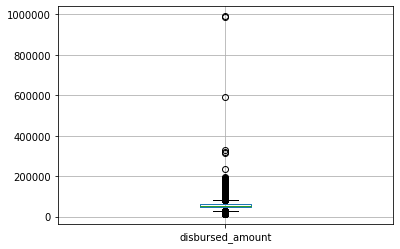

In [31]:
print(train.boxplot(column='disbursed_amount'))

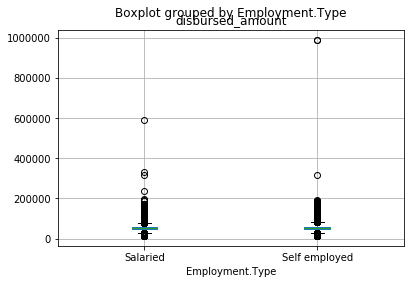

In [32]:
train.boxplot(column='disbursed_amount', by = 'Employment.Type')

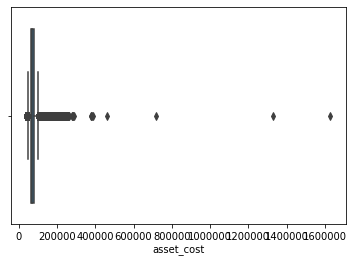

In [33]:
sns.boxplot(x=train['asset_cost'])

In [34]:
#Handling Skewness with Histogram:

In [35]:
#to check skewness value 
from scipy.stats import skew

UniqueID
-0.0022615767817279185


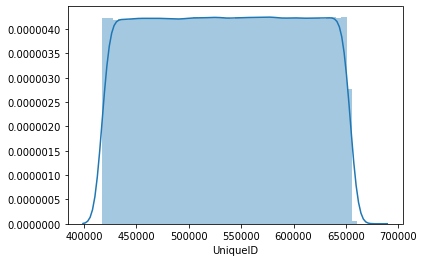

disbursed_amount
4.492210762942641


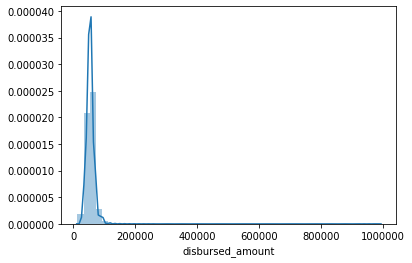

asset_cost
6.133445875564246


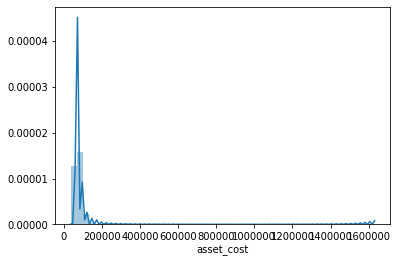

ltv
-1.0757591434318203


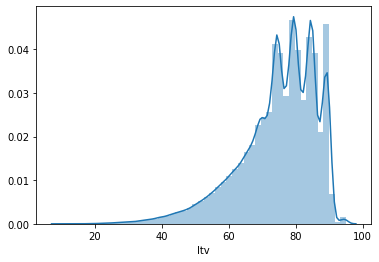

branch_id
1.0274747466924894


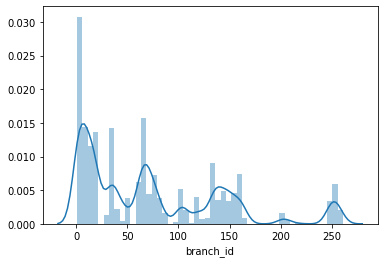

supplier_id
-0.16890718807839514


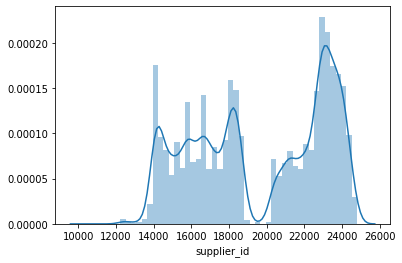

manufacturer_id
0.38897796614840147


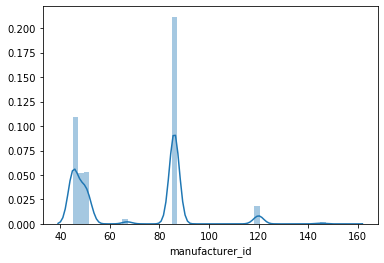

Current_pincode_ID
0.27818289219043946


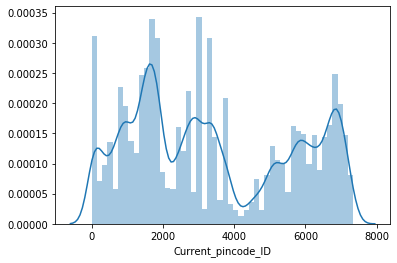

State_ID
0.821966104440714


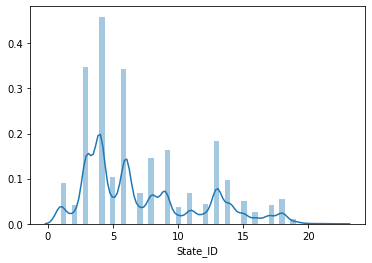

Employee_code_ID
0.2443118105161251


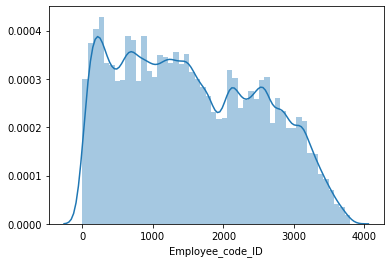

MobileNo_Avl_Flag
0.0


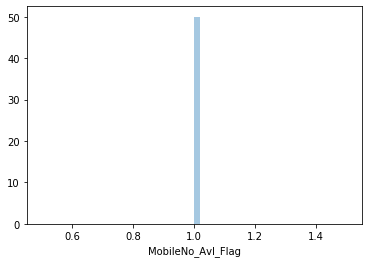

Aadhar_flag
-1.8581046470570355


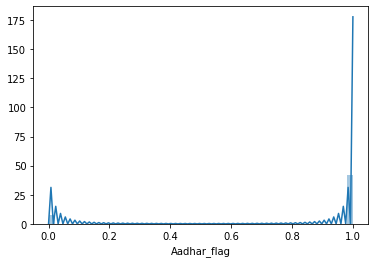

PAN_flag
3.2114411286414026


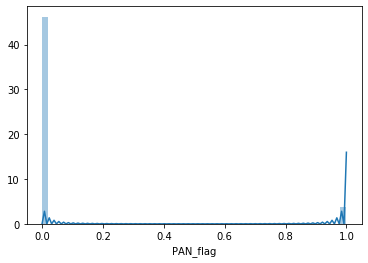

VoterID_flag
2.0171228271814288


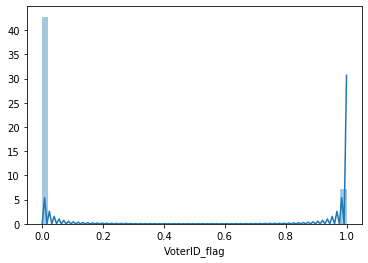

Driving_flag
6.328433978307567


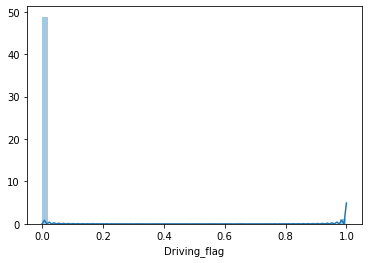

Passport_flag
21.611818069557824


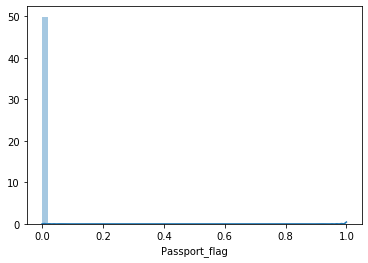

PERFORM_CNS.SCORE
0.4451476002647479


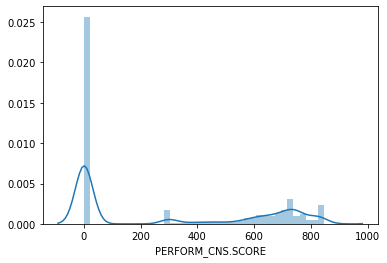

PRI.NO.OF.ACCTS
9.744782628834027


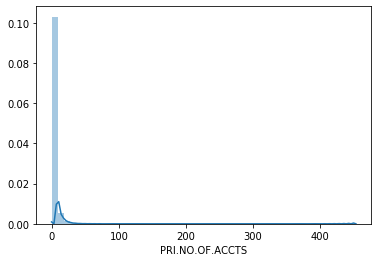

PRI.ACTIVE.ACCTS
5.3718156171711


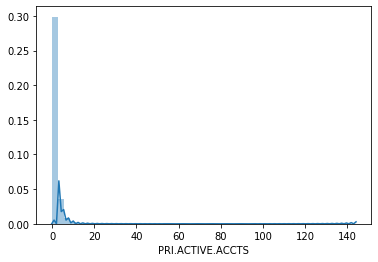

PRI.OVERDUE.ACCTS
7.512879130930295


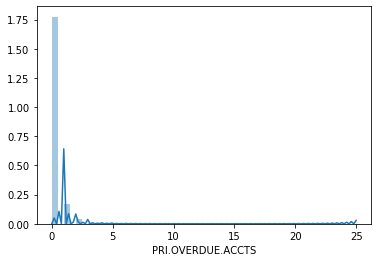

PRI.CURRENT.BALANCE
29.425623934631233


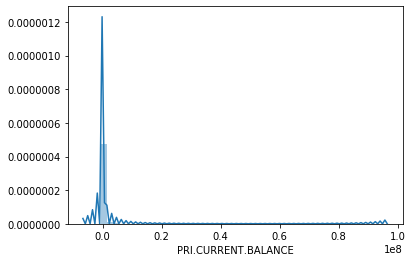

PRI.SANCTIONED.AMOUNT
323.69512955555064


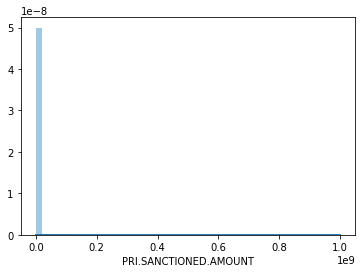

PRI.DISBURSED.AMOUNT
322.5394194305804


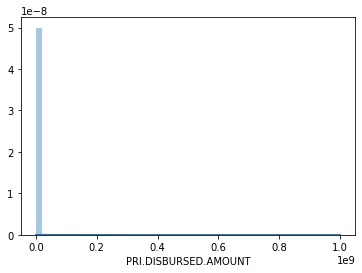

SEC.NO.OF.ACCTS
27.985910269033976


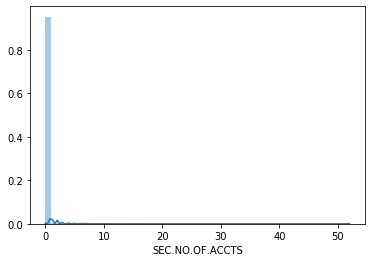

SEC.ACTIVE.ACCTS
30.599313283013327


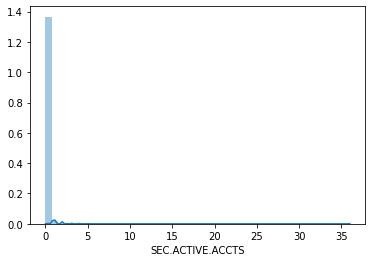

SEC.OVERDUE.ACCTS
24.12911601282025


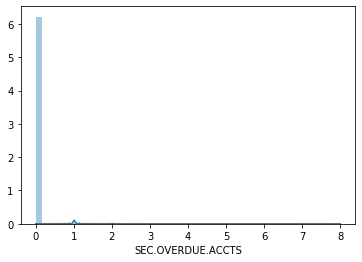

SEC.CURRENT.BALANCE
108.50559713001698


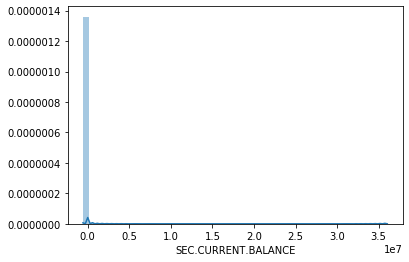

SEC.SANCTIONED.AMOUNT
75.25444780586828


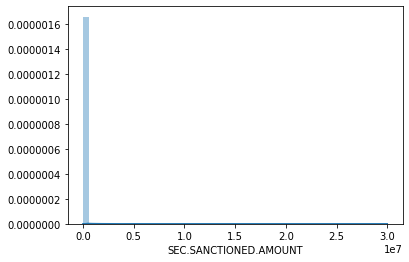

SEC.DISBURSED.AMOUNT
75.76376447967141


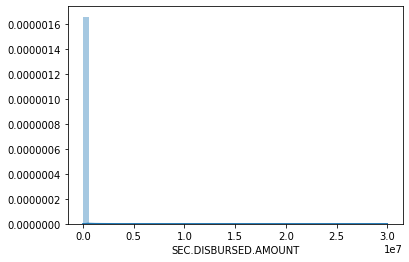

PRIMARY.INSTAL.AMT
69.91570666536603


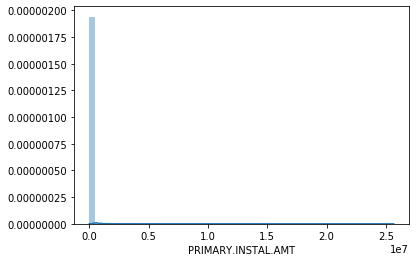

SEC.INSTAL.AMT
153.8053794262336


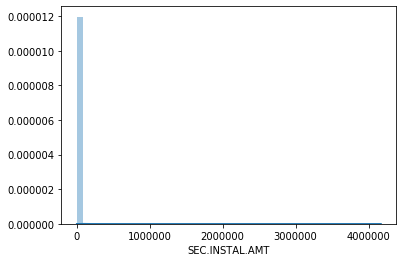

NEW.ACCTS.IN.LAST.SIX.MONTHS
4.839294686210946


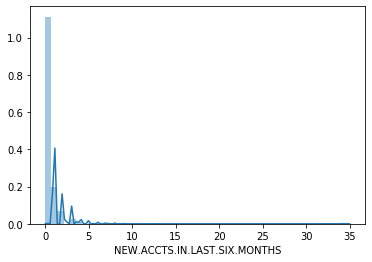

DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS
6.641953051136021


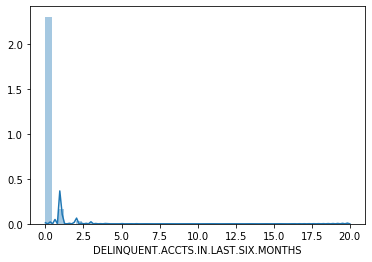

NO.OF_INQUIRIES
7.87063219659869


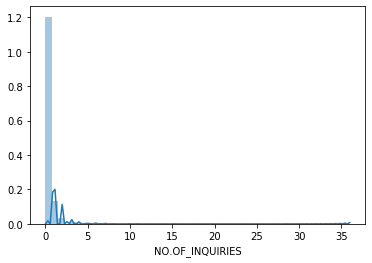

loan_default
1.3726034781769063


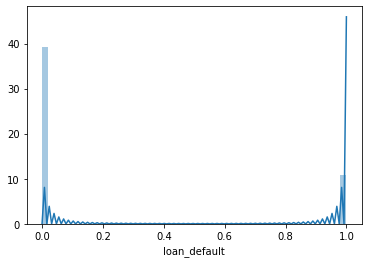

credit_history_length
2.9691363518750102


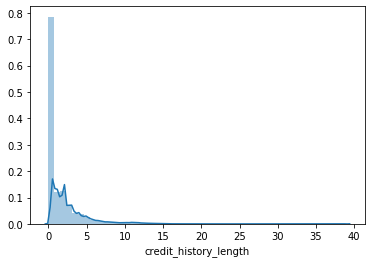

average_acct_age
3.285121149450038


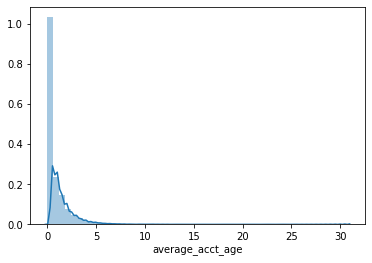

In [38]:
for col in train_num:
    print(col)
    print(skew(train_num[col]))
    plt.figure()
    sns.distplot(train_num[col])
    plt.show()

In [39]:
train_num.corr()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,credit_history_length,average_acct_age
UniqueID,1.000000,0.145575,0.144671,-0.030537,-0.004509,0.025747,-0.021514,0.030500,-0.057734,0.075983,...,-0.017114,-0.016857,-0.009321,-0.013518,-0.003842,-0.009186,0.016537,0.033848,-0.018799,-0.011912
disbursed_amount,0.145575,1.000000,0.752668,0.376747,0.018328,0.078596,0.095203,0.068540,-0.023956,0.010120,...,-0.005271,-0.005119,0.002350,-0.005525,0.035880,0.020198,0.038513,0.077675,0.013402,0.004205
asset_cost,0.144671,0.752668,1.000000,-0.301188,0.018586,0.150002,-0.005256,0.275878,-0.026348,0.008711,...,-0.010776,-0.010594,-0.004356,-0.005738,-0.021968,-0.007932,-0.017301,0.014261,-0.023563,-0.015614
ltv,-0.030537,0.376747,-0.301188,1.000000,0.006382,-0.103732,0.121003,-0.300112,0.004882,0.004940,...,0.008800,0.008733,0.007358,0.000481,0.083824,0.041921,0.085725,0.098208,0.053607,0.029853
branch_id,-0.004509,0.018328,0.018586,0.006382,1.000000,0.225744,-0.049957,0.048192,0.187782,0.088764,...,0.002404,0.002457,0.004955,0.004265,-0.008354,-0.001730,-0.001813,0.030193,-0.002577,0.005338
supplier_id,0.025747,0.078596,0.150002,-0.103732,0.225744,1.000000,-0.063916,0.187401,0.105502,0.095792,...,-0.010175,-0.010031,-0.011953,-0.005826,-0.053264,-0.024622,-0.030988,0.027357,-0.061370,-0.034095
manufacturer_id,-0.021514,0.095203,-0.005256,0.121003,-0.049957,-0.063916,1.000000,-0.104349,0.026412,-0.045009,...,0.003206,0.003301,0.014116,0.003020,0.050079,0.019438,0.010012,-0.025039,0.061534,0.042522
Current_pincode_ID,0.030500,0.068540,0.275878,-0.300112,0.048192,0.187401,-0.104349,1.000000,0.047903,-0.042609,...,-0.026059,-0.025630,0.002275,-0.006305,-0.100080,-0.057419,-0.058821,0.028419,-0.095906,-0.062704
State_ID,-0.057734,-0.023956,-0.026348,0.004882,0.187782,0.105502,0.026412,0.047903,1.000000,0.117309,...,0.017842,0.017651,0.015843,0.009850,-0.014942,-0.000655,-0.016129,0.048075,-0.014526,-0.008205
Employee_code_ID,0.075983,0.010120,0.008711,0.004940,0.088764,0.095792,-0.045009,-0.042609,0.117309,1.000000,...,-0.002259,-0.002224,0.013470,0.001894,0.005473,0.003624,-0.002108,0.020657,0.002189,0.000297


[]

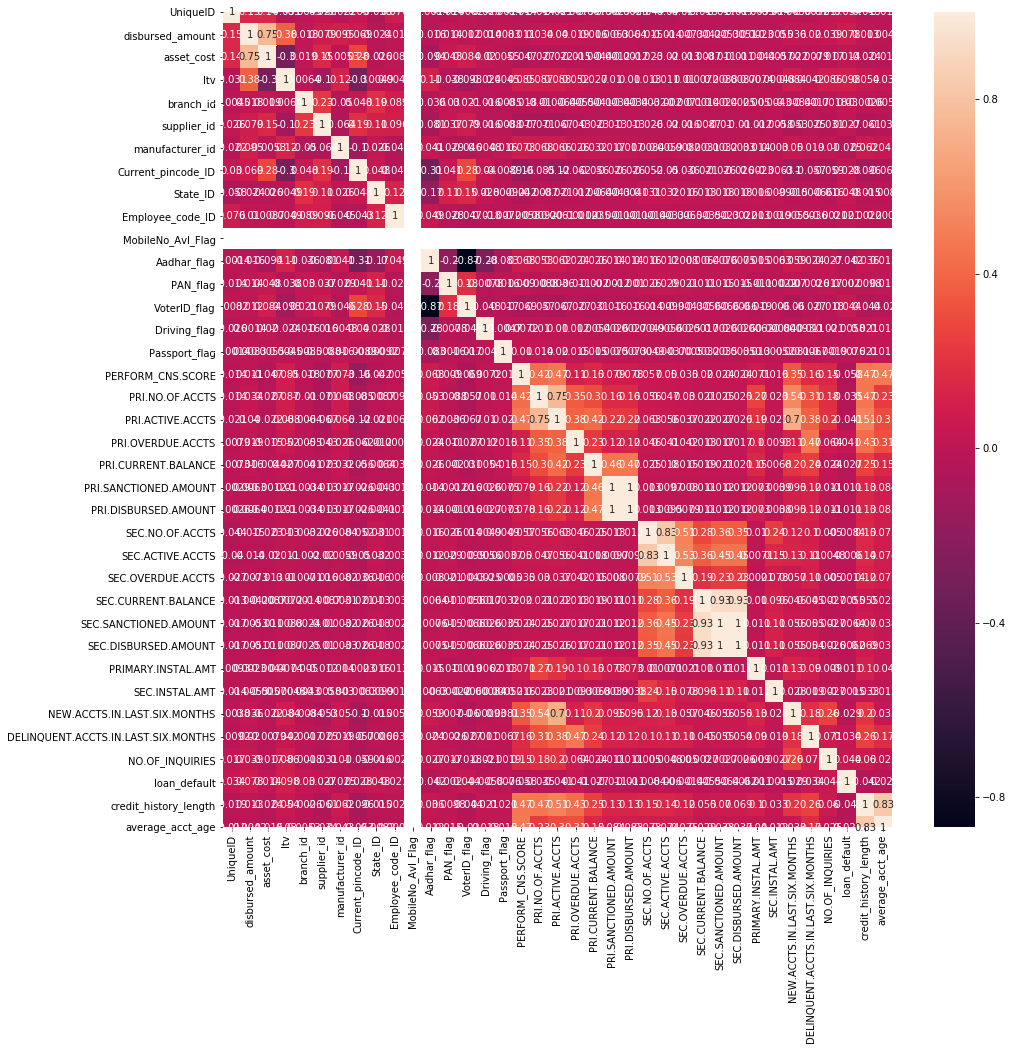

In [41]:
plt.figure(figsize=(15,15))
sns.heatmap(train_num.corr(),annot=True)
plt.plot()

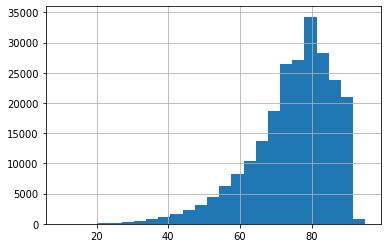

In [42]:
train['ltv'].hist(bins=25)

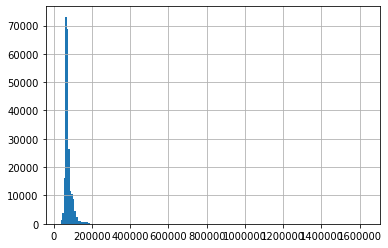

In [43]:
train['asset_cost'].hist(bins=200)

In [44]:
#apply sqrt() 
train_num["ltv"]=np.sqrt(train_num["ltv"])

In [45]:
#apply sqrt() 
train_num["asset_cost"]=np.sqrt(train_num["asset_cost"])

In [46]:
skew(train_num["ltv"])

-1.4113868291324698

In [47]:
skew(train_num["asset_cost"])

2.0940009676797593

In [52]:
train_new=pd.concat([train_num,train_cat],axis=1)

In [53]:
train_new.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,credit_history_length,average_acct_age,Employment.Type,PERFORM_CNS.SCORE.DESCRIPTION,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,420825,50578,241.660919,9.463086,67,22807,45,1441,6,1998,...,0,0,0,0,0.000000,0.000000,0,13,0,0
1,537409,47145,256.027342,8.557453,67,22807,45,1502,6,1998,...,0,1,0,1,1.916667,1.916667,1,8,83,130
2,417566,53278,247.709507,9.467312,67,22807,45,1497,6,1998,...,0,0,0,0,0.000000,0.000000,1,13,0,0
3,624493,57513,257.124483,9.406381,67,22807,45,1501,6,1998,...,0,0,1,1,1.250000,0.666667,1,11,10,133
4,539055,52378,245.560583,9.401596,67,22807,45,1495,6,1998,...,0,0,1,1,0.000000,0.000000,1,13,0,0


In [48]:
#Scaling

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
mx=MinMaxScaler()

In [56]:
for col in train_new:
    mx=MinMaxScaler()
    train_new[col]=mx.fit_transform(train_new[[col]])
    

In [57]:
train_new.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,credit_history_length,average_acct_age,Employment.Type,PERFORM_CNS.SCORE.DESCRIPTION,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,0.013392,0.038125,0.045488,0.956882,0.253846,0.860214,0.0,0.196078,0.238095,0.526357,...,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.0,0.684211,0.000000,0.000000
1,0.473007,0.034612,0.058741,0.819243,0.253846,0.860214,0.0,0.204385,0.238095,0.526357,...,0.0,0.05,0.000000,1.0,0.049145,0.062331,1.0,0.421053,0.434555,0.443686
2,0.000544,0.040888,0.051068,0.957524,0.253846,0.860214,0.0,0.203704,0.238095,0.526357,...,0.0,0.00,0.000000,0.0,0.000000,0.000000,1.0,0.684211,0.000000,0.000000
3,0.816322,0.045222,0.059753,0.948264,0.253846,0.860214,0.0,0.204248,0.238095,0.526357,...,0.0,0.00,0.027778,1.0,0.032051,0.021680,1.0,0.578947,0.052356,0.453925
4,0.479496,0.039967,0.049085,0.947536,0.253846,0.860214,0.0,0.203431,0.238095,0.526357,...,0.0,0.00,0.027778,1.0,0.000000,0.000000,1.0,0.684211,0.000000,0.000000


In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
for col in train_new:
    ss=StandardScaler()
    train_new[col]=ss.fit_transform(train_new[[col]])
    

In [60]:
train_new.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,credit_history_length,average_acct_age,Employment.Type,PERFORM_CNS.SCORE.DESCRIPTION,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,-1.684720,-0.291335,-1.050214,1.202625,-0.085002,0.907336,-1.085216,-0.873885,-0.281611,0.459901,...,-0.399782,-0.253566,-0.292450,-0.526550,-0.568640,-0.590198,-1.175829,0.674034,-0.646476,-0.723695
1,0.021831,-0.555997,-0.579845,-0.084534,-0.085002,0.907336,-1.085216,-0.846631,-0.281611,0.459901,...,-0.399782,2.347632,-0.292450,1.899154,0.236085,0.932337,0.850464,-0.308750,1.258263,0.669071
2,-1.732425,-0.083183,-0.852178,1.208632,-0.085002,0.907336,-1.085216,-0.848865,-0.281611,0.459901,...,-0.399782,-0.253566,-0.292450,-0.526550,-0.568640,-0.590198,0.850464,0.674034,-0.646476,-0.723695
3,1.296563,0.243307,-0.543923,1.122031,-0.085002,0.907336,-1.085216,-0.847077,-0.281611,0.459901,...,-0.399782,-0.253566,1.122986,1.899154,-0.043819,-0.060621,0.850464,0.280920,-0.416989,0.701212
4,0.045926,-0.152567,-0.922535,1.115230,-0.085002,0.907336,-1.085216,-0.849758,-0.281611,0.459901,...,-0.399782,-0.253566,1.122986,1.899154,-0.568640,-0.590198,0.850464,0.674034,-0.646476,-0.723695
